<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/2025/%EB%8F%84%EC%9E%A5%EA%B9%A8%EA%B8%B0/06_Feature_Engineering_Extraction_Consumer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: 내 드라이브를 마운트(mount) 하라

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [13]:
file_path = '/content/drive/MyDrive/data/processed_df.pkl'
import pandas as pd
df = pd.read_pickle(file_path)

df.head()

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,일요일모바일,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year,모바일총사용시간
0,남,14,서울,학생(재수생포함),549.5,중학교 재학,자가,미혼,2,90,...,30,음악/공연/오디션,스포츠/골프,예능/오락,어린이/만화,로맨스 드라마,멜로 드라마,1,2018,90
1,남,14,서울,학생(재수생포함),749.5,중학교 재학,자가,미혼,2,60,...,60,국내 드라마,영화,예능/오락,음악/공연/오디션,가족 드라마,정통사극,0,2018,120
2,남,14,서울,학생(재수생포함),549.5,중학교 재학,자가,미혼,2,10,...,120,국내 드라마,예능/오락,음악/공연/오디션,예능/오락,형사/추리/법정 드라마,멜로 드라마,0,2018,420
3,남,14,서울,학생(재수생포함),749.5,중학교 재학,전세,미혼,2,90,...,120,국내 드라마,영화,예능/오락,음악/공연/오디션,로맨스 드라마,멜로 드라마,1,2018,330
4,남,14,서울,학생(재수생포함),549.5,중학교 재학,자가,미혼,2,60,...,60,해외 드라마,예능/오락,교육,예능/오락,로맨스 드라마,멜로 드라마,0,2018,150


## **1. standard scaler**

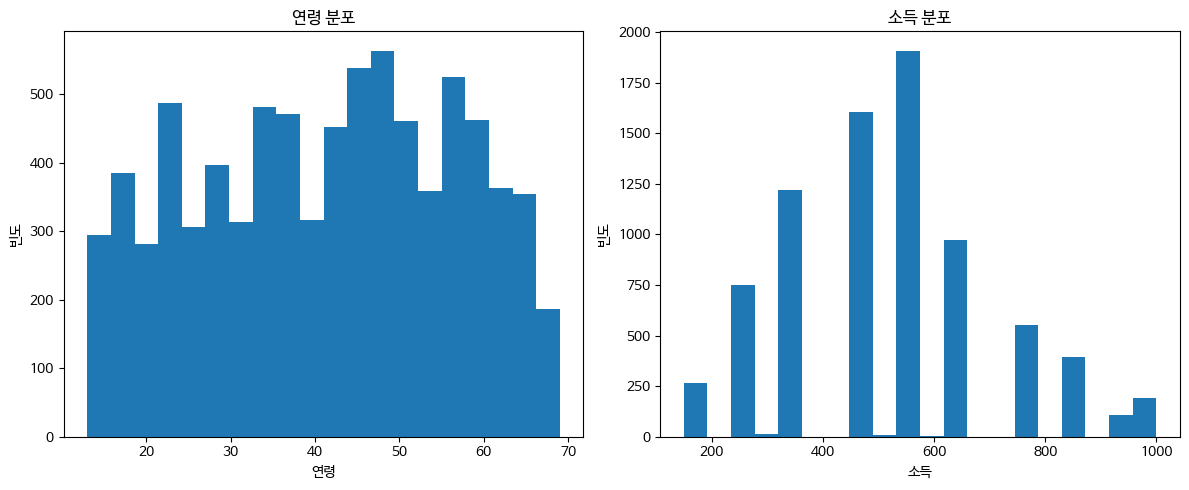

In [14]:
# prompt: 연령과 소득을 동시에 시각화

import matplotlib.pyplot as plt
import seaborn as sns

# 연령과 소득의 히스토그램 (분포 확인)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['연령'], bins=20)
plt.title('연령 분포')
plt.xlabel('연령')
plt.ylabel('빈도')

plt.subplot(1, 2, 2)
plt.hist(df['소득'], bins=20)
plt.title('소득 분포')
plt.xlabel('소득')
plt.ylabel('빈도')

plt.tight_layout()
plt.show()

<ipython-input-15-80e052c1f4ec>:31: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


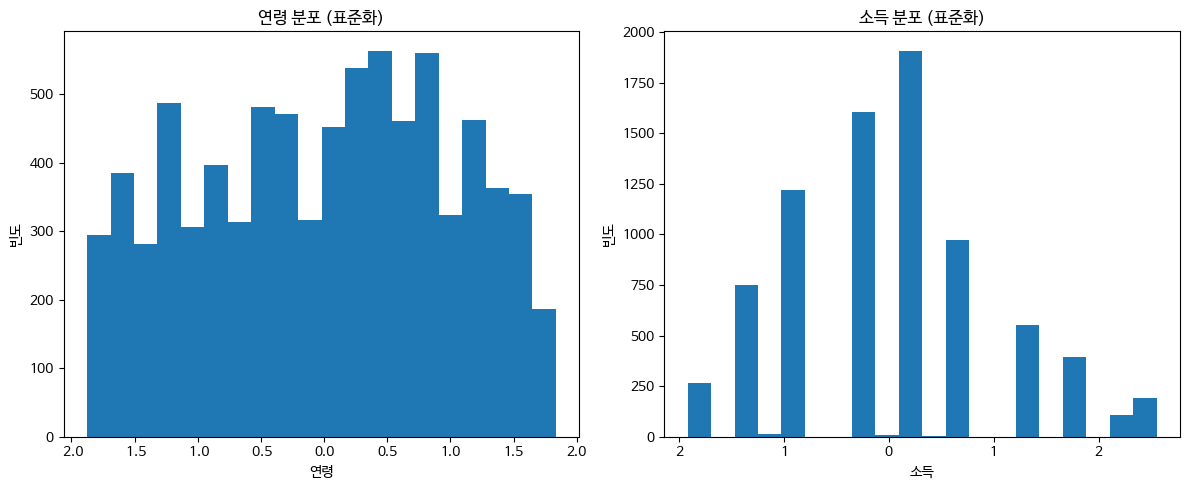

In [15]:
# prompt: 연령과 소득을 standard scale하고 시각화 해줘

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 연령과 소득 컬럼 선택
features = ['연령', '소득']
# features = df[['연령', '소득']]

# StandardScaler 적용
df[features] = scaler.fit_transform(df[features])

# 스케일링된 데이터의 히스토그램 (분포 확인)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['연령'], bins=20)
plt.title('연령 분포 (표준화)')
plt.xlabel('연령')
plt.ylabel('빈도')

plt.subplot(1, 2, 2)
plt.hist(df['소득'], bins=20)
plt.title('소득 분포 (표준화)')
plt.xlabel('소득')
plt.ylabel('빈도')

plt.tight_layout()
plt.show()


## **2. 이산화(Discretinization)**

<Axes: >

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


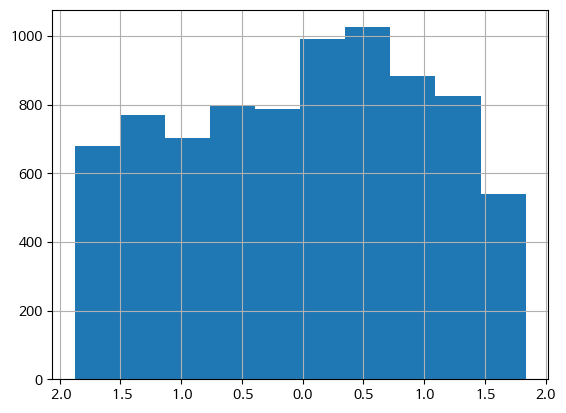

In [16]:
df['연령'].hist()

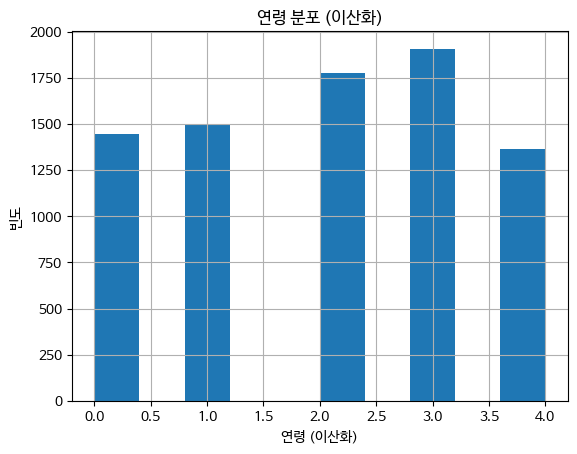

In [17]:
# prompt: 연령을 scikir learn함수로 이산화해주라

import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# KBinsDiscretizer 객체 생성 (균등 간격으로 5개의 구간으로 나눔)
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# 연령 컬럼을 이산화
df['연령_이산화'] = discretizer.fit_transform(df[['연령']])

# 이산화된 연령 컬럼의 히스토그램
df['연령_이산화'].hist()
plt.title('연령 분포 (이산화)')
plt.xlabel('연령 (이산화)')
plt.ylabel('빈도')
plt.show()


In [18]:
df.head()

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year,모바일총사용시간,연령_이산화
0,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,90,...,음악/공연/오디션,스포츠/골프,예능/오락,어린이/만화,로맨스 드라마,멜로 드라마,1,2018,90,0.0
1,남,-1.809092,서울,학생(재수생포함),1.236526,중학교 재학,자가,미혼,2,60,...,국내 드라마,영화,예능/오락,음악/공연/오디션,가족 드라마,정통사극,0,2018,120,0.0
2,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,10,...,국내 드라마,예능/오락,음악/공연/오디션,예능/오락,형사/추리/법정 드라마,멜로 드라마,0,2018,420,0.0
3,남,-1.809092,서울,학생(재수생포함),1.236526,중학교 재학,전세,미혼,2,90,...,국내 드라마,영화,예능/오락,음악/공연/오디션,로맨스 드라마,멜로 드라마,1,2018,330,0.0
4,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,60,...,해외 드라마,예능/오락,교육,예능/오락,로맨스 드라마,멜로 드라마,0,2018,150,0.0


In [19]:
df.columns

Index(['성별', '연령', '지역', '직업', '소득', '학력', '주거형태', '결혼여부', '자녀수', '평일인터넷',
       '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일', '일요일모바일', 'TV장르1', 'TV장르2',
       'TV장르3', 'TV장르4', '국드장르1', '국드장르2', 'PPL구입여부', 'year', '모바일총사용시간',
       '연령_이산화'],
      dtype='object')

In [21]:
features = ['TV장르1', 'TV장르2', 'TV장르3', 'TV장르4', '국드장르1', '국드장르2']

In [22]:
# prompt: features의 고유값을 보여줘

print(df[features].nunique())


TV장르1    12
TV장르2    16
TV장르3    16
TV장르4    16
국드장르1    21
국드장르2    21
dtype: int64


In [23]:
# prompt: TV장르1 부터  ~ TV장르4  까지 고유값을 모두 보야줘

for col in ['TV장르1', 'TV장르2', 'TV장르3', 'TV장르4']:
  print(f'{col} 고유값:')
  print(df[col].unique())
  print('---')


TV장르1 고유값:
['음악/공연/오디션', '국내 드라마', '해외 드라마', '예능/오락', '영화', ..., '스포츠/골프', '시사/토론', '교육', '기타', '다큐멘터리']
Length: 12
Categories (12, object): ['교양/생활정보', '교육', '국내 드라마', '기타', ..., '영화', '예능/오락', '음악/공연/오디션', '해외 드라마']
---
TV장르2 고유값:
['스포츠/골프', '영화', '예능/오락', '게임', '음악/공연/오디션', ..., '어린이/만화', '교육', '뉴스/보도', '기타', '취미/레저']
Length: 16
Categories (16, object): ['게임', '경제정보', '교양/생활정보', '교육', ..., '예능/오락', '음악/공연/오디션', '취미/레저',
                          '해외 드라마']
---
TV장르3 고유값:
['예능/오락', '음악/공연/오디션', '교육', '스포츠/골프', '시사/토론', ..., '취미/레저', '기타', '어린이/만화', '종교', '뉴스/보도']
Length: 16
Categories (16, object): ['게임', '경제정보', '교육', '국내 드라마', ..., '음악/공연/오디션', '종교', '취미/레저', '해외 드라마']
---
TV장르4 고유값:
['어린이/만화', '음악/공연/오디션', '예능/오락', '스포츠/골프', '국내 드라마', ..., '종교', '경제정보', '시사/토론', '교양/생활정보', '뉴스/보도']
Length: 16
Categories (16, object): ['게임', '경제정보', '교양/생활정보', '교육', ..., '음악/공연/오디션', '종교', '취미/레저', '해외 드라마']
---


In [24]:
# prompt: ['TV장르1', 'TV장르2', 'TV장르3', 'TV장르4'] 의 고유값의 출현빈도를 보여줘

for col in ['TV장르1', 'TV장르2', 'TV장르3', 'TV장르4']:
  print(f'{col} 고유값 출현 빈도:')
  print(df[col].value_counts())
  print('---')

TV장르1 고유값 출현 빈도:
TV장르1
뉴스/보도        5977
국내 드라마        956
예능/오락         452
교양/생활정보       252
영화            164
시사/토론         134
해외 드라마         29
음악/공연/오디션      22
스포츠/골프          8
다큐멘터리           3
교육              2
기타              1
Name: count, dtype: int64
---
TV장르2 고유값 출현 빈도:
TV장르2
교양/생활정보      2604
국내 드라마       2179
예능/오락        1220
시사/토론        1080
영화            401
음악/공연/오디션     182
스포츠/골프        107
해외 드라마        103
다큐멘터리          79
어린이/만화         15
교육             11
뉴스/보도           7
경제정보            5
게임              5
기타              1
취미/레저           1
Name: count, dtype: int64
---
TV장르3 고유값 출현 빈도:
TV장르3
예능/오락        3140
국내 드라마       1804
시사/토론        1145
영화            662
음악/공연/오디션     416
스포츠/골프        290
다큐멘터리         281
해외 드라마        148
어린이/만화         28
교육             26
게임             18
경제정보           14
취미/레저          11
종교              9
뉴스/보도           7
기타              1
Name: count, dtype: int64
---
TV장르4 고유값 출현 빈도:
TV장르4
예능/오락        4742
국내 드라마  

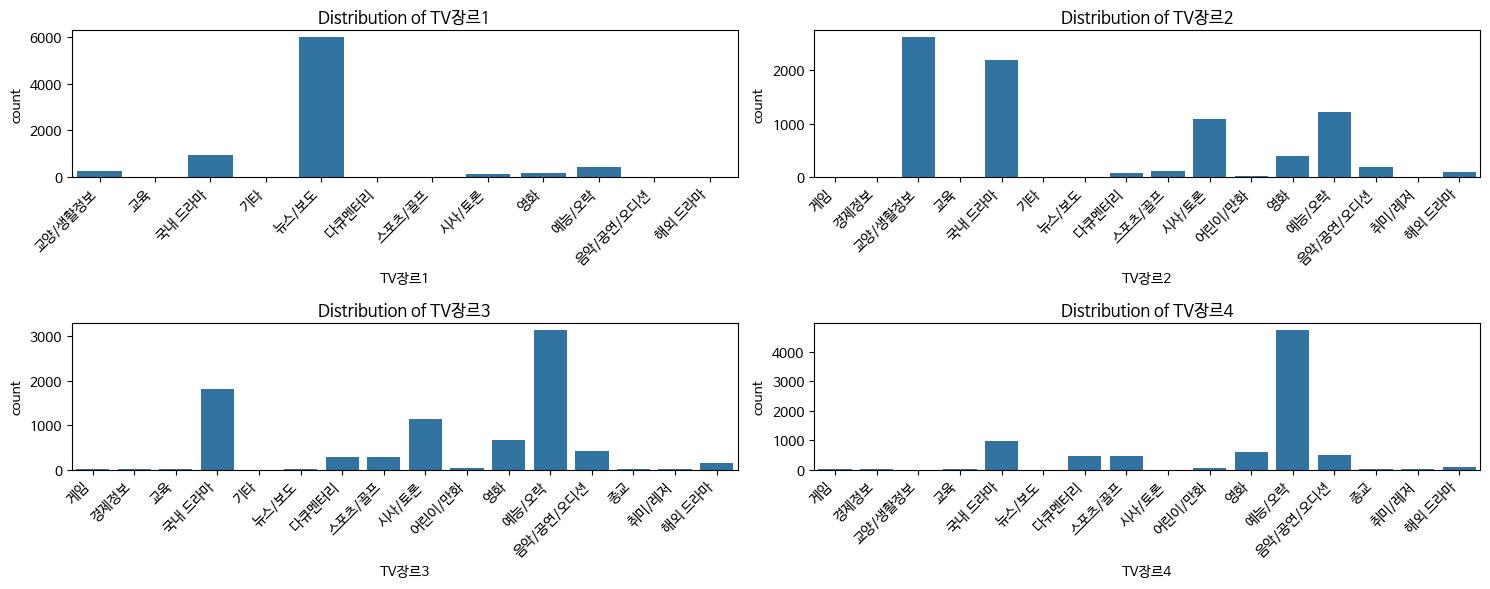

In [26]:
# prompt: 위의 내용을 시각화 해줘

import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code)

# Visualize the distribution of TV genres
plt.figure(figsize=(15, 6))
for i, col in enumerate(['TV장르1', 'TV장르2', 'TV장르3', 'TV장르4']):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

In [29]:
# prompt: TV 장르별로 각 값의출현빈도를 모두 표현하는 데이터프레임으로

import pandas as pd
# Create a list to store the value counts for each TV genre column
genre_counts = []

# Iterate through the TV genre columns
for col in ['TV장르1', 'TV장르2', 'TV장르3', 'TV장르4']:
    # Calculate the value counts for the current column and append it to the list
    genre_counts.append(df[col].value_counts())

# Concatenate the value counts into a single DataFrame
genre_counts_df = pd.concat(genre_counts, axis=1, keys=['TV장르1', 'TV장르2', 'TV장르3', 'TV장르4'])

# Fill NaN values with 0
genre_counts_df = genre_counts_df.fillna(0)

# Display the DataFrame
genre_counts_df


,TV장르1,TV장르2,TV장르3,TV장르4
뉴스/보도,5977.0,7.0,7.0,1.0
국내 드라마,956.0,2179.0,1804.0,962.0
예능/오락,452.0,1220.0,3140.0,4742.0
교양/생활정보,252.0,2604.0,0.0,1.0
영화,164.0,401.0,662.0,586.0
시사/토론,134.0,1080.0,1145.0,3.0
해외 드라마,29.0,103.0,148.0,87.0
음악/공연/오디션,22.0,182.0,416.0,495.0
스포츠/골프,8.0,107.0,290.0,480.0
다큐멘터리,3.0,79.0,281.0,468.0


## **TV장르 4개를 어떻게 특성변화할까?**

In [30]:
# prompt: genre_counts_df의 행 합계를 구하고 내림차순으로

import pandas as pd
# Calculate the sum of each row in genre_counts_df
row_sums = genre_counts_df.sum(axis=1)

# Create a new DataFrame with the row sums
row_sums_df = pd.DataFrame({'Row_Sum': row_sums})

# Sort the DataFrame in descending order based on the row sums
sorted_row_sums_df = row_sums_df.sort_values(by='Row_Sum', ascending=False)

# Display the sorted DataFrame
sorted_row_sums_df


,Row_Sum
예능/오락,9554.0
뉴스/보도,5992.0
국내 드라마,5901.0
교양/생활정보,2857.0
시사/토론,2362.0
영화,1813.0
음악/공연/오디션,1115.0
스포츠/골프,885.0
다큐멘터리,831.0
해외 드라마,367.0


In [34]:
df.sample(10)

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year,모바일총사용시간,연령_이산화
6855,여,-0.153044,경기/인천,전업주부,0.186346,대학교 졸업,자가,기혼,2,90,...,뉴스/보도,교양/생활정보,국내 드라마,영화,멜로 드라마,코미디/시트콤/예능 드라마,0,2019,360,2.0
329,남,0.641860,서울,행정관리/전문직,0.186346,대학교 졸업,자가,기혼,2,90,...,뉴스/보도,스포츠/골프,예능/오락,예능/오락,로맨스 드라마,멜로 드라마,0,2018,600,3.0
3592,여,-0.484253,광주/전라/제주,판매/서비스직,-0.863834,대학교 졸업,전세,기혼,1,10,...,국내 드라마,예능/오락,예능/오락,예능/오락,로맨스 드라마,멜로 드라마,1,2018,130,1.0
1716,여,1.238037,경기/인천,전업주부,0.186346,고등학교 졸업,자가,기혼,1,30,...,뉴스/보도,교양/생활정보,시사/토론,국내 드라마,가족 드라마,형사/추리/법정 드라마,0,2018,270,4.0
4877,여,1.238037,서울,전업주부,-1.914013,고등학교 졸업,자가,기혼,2,60,...,뉴스/보도,교양/생활정보,국내 드라마,예능/오락,로맨스 드라마,멜로 드라마,0,2019,420,4.0
4403,남,1.370521,서울,무직/기타,-1.914013,고등학교 졸업,자가,기혼,2,10,...,뉴스/보도,교양/생활정보,시사/토론,다큐멘터리,로맨스 드라마,멜로 드라마,0,2019,40,4.0
1629,여,-0.947947,경기/인천,사무직,0.186346,전문대학 졸업,자가,미혼,2,60,...,국내 드라마,예능/오락,예능/오락,예능/오락,로맨스 드라마,성공신화 드라마,0,2018,660,1.0
5550,남,0.443134,경기/인천,사무직,1.236526,대학교 졸업,자가,기혼,2,60,...,뉴스/보도,국내 드라마,해외 드라마,영화,로맨스 드라마,성공신화 드라마,0,2019,180,3.0
3108,여,1.436763,경기/인천,전업주부,0.186346,고등학교 졸업,자가,기혼,3,60,...,국내 드라마,예능/오락,예능/오락,예능/오락,특별히 즐겨보는 장르 없음,멜로 드라마,1,2018,180,4.0
5067,남,1.039311,부산/울산/경남,기능/노무직,-1.388923,고등학교 졸업,자가,기혼,2,60,...,뉴스/보도,교양/생활정보,시사/토론,예능/오락,로맨스 드라마,멜로 드라마,0,2019,60,3.0


In [37]:
text_df = df[features]
text_df

,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2
0,음악/공연/오디션,스포츠/골프,예능/오락,어린이/만화,로맨스 드라마,멜로 드라마
1,국내 드라마,영화,예능/오락,음악/공연/오디션,가족 드라마,정통사극
2,국내 드라마,예능/오락,음악/공연/오디션,예능/오락,형사/추리/법정 드라마,멜로 드라마
3,국내 드라마,영화,예능/오락,음악/공연/오디션,로맨스 드라마,멜로 드라마
4,해외 드라마,예능/오락,교육,예능/오락,로맨스 드라마,멜로 드라마
...,...,...,...,...,...,...
7995,뉴스/보도,교양/생활정보,시사/토론,국내 드라마,로맨스 드라마,멜로 드라마
7996,국내 드라마,예능/오락,예능/오락,예능/오락,로맨스 드라마,멜로 드라마
7997,뉴스/보도,국내 드라마,영화,예능/오락,로맨스 드라마,멜로 드라마
7998,뉴스/보도,국내 드라마,예능/오락,예능/오락,로맨스 드라마,멜로 드라마


In [39]:
# prompt: text_df의 모든 값을 리스트로 만들어줘

text_df_list = text_df.values.tolist()
text_df_list[:5]

[['음악/공연/오디션', '스포츠/골프', '예능/오락', '어린이/만화', '로맨스 드라마', '멜로 드라마'],
 ['국내 드라마', '영화', '예능/오락', '음악/공연/오디션', '가족 드라마', '정통사극'],
 ['국내 드라마', '예능/오락', '음악/공연/오디션', '예능/오락', '형사/추리/법정 드라마', '멜로 드라마'],
 ['국내 드라마', '영화', '예능/오락', '음악/공연/오디션', '로맨스 드라마', '멜로 드라마'],
 ['해외 드라마', '예능/오락', '교육', '예능/오락', '로맨스 드라마', '멜로 드라마']]

In [40]:
len(text_df_list)

8000

In [41]:
# prompt: text_df_list의 각 원소인 리스트를 텍스트로 만들어줘

text_df_list_str = [' '.join(map(str, lst)) for lst in text_df_list]
text_df_list_str[:5]

['음악/공연/오디션 스포츠/골프 예능/오락 어린이/만화 로맨스 드라마 멜로 드라마',
 '국내 드라마 영화 예능/오락 음악/공연/오디션 가족 드라마 정통사극',
 '국내 드라마 예능/오락 음악/공연/오디션 예능/오락 형사/추리/법정 드라마 멜로 드라마',
 '국내 드라마 영화 예능/오락 음악/공연/오디션 로맨스 드라마 멜로 드라마',
 '해외 드라마 예능/오락 교육 예능/오락 로맨스 드라마 멜로 드라마',
 '예능/오락 게임 예능/오락 예능/오락 로맨스 드라마 멜로 드라마',
 '예능/오락 음악/공연/오디션 예능/오락 예능/오락 로맨스 드라마 멜로 드라마',
 '영화 예능/오락 스포츠/골프 예능/오락 로맨스 드라마 멜로 드라마',
 '영화 예능/오락 음악/공연/오디션 스포츠/골프 로맨스 드라마 멜로 드라마',
 '음악/공연/오디션 스포츠/골프 예능/오락 예능/오락 로맨스 드라마 멜로 드라마',
 '영화 예능/오락 예능/오락 예능/오락 로맨스 드라마 멜로 드라마',
 '예능/오락 교양/생활정보 예능/오락 예능/오락 로맨스 드라마 멜로 드라마',
 '뉴스/보도 교양/생활정보 시사/토론 국내 드라마 특별히 즐겨보는 장르 없음 멜로 드라마',
 '뉴스/보도 예능/오락 다큐멘터리 예능/오락 로맨스 드라마 멜로 드라마',
 '예능/오락 교양/생활정보 예능/오락 예능/오락 로맨스 드라마 멜로 드라마',
 '예능/오락 교양/생활정보 예능/오락 예능/오락 로맨스 드라마 멜로 드라마',
 '예능/오락 교양/생활정보 예능/오락 예능/오락 로맨스 드라마 멜로 드라마',
 '예능/오락 교양/생활정보 예능/오락 예능/오락 로맨스 드라마 멜로 드라마',
 '교양/생활정보 영화 예능/오락 다큐멘터리 로맨스 드라마 멜로 드라마',
 '국내 드라마 영화 예능/오락 음악/공연/오디션 로맨스 드라마 멜로 드라마',
 '국내 드라마 영화 예능/오락 음악/공연/오디션 액션 드라마 스포츠 드라마',
 '뉴스/보도 예능/오락 다큐멘터리 스포츠/골프 로맨스 드라마 멜로 드라마',
 '예능/오락 음악/공

## **[특성변수 도출방법은 여기를 클릭](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)**

In [43]:
# prompt: text_df_list의 각 원소인 리스트를 텍스트로 만들어줘. 단 리스트의 각 원소의 space는 제거해줘

text_df_list_str = [' '.join(map(lambda x: str(x).replace(' ', ''), lst)) for lst in text_df_list]
text_df_list_str[:5]


['음악/공연/오디션 스포츠/골프 예능/오락 어린이/만화 로맨스드라마 멜로드라마',
 '국내드라마 영화 예능/오락 음악/공연/오디션 가족드라마 정통사극',
 '국내드라마 예능/오락 음악/공연/오디션 예능/오락 형사/추리/법정드라마 멜로드라마',
 '국내드라마 영화 예능/오락 음악/공연/오디션 로맨스드라마 멜로드라마',
 '해외드라마 예능/오락 교육 예능/오락 로맨스드라마 멜로드라마']

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

corpus = text_df_list_str
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
X.shape

(8000, 58)

In [46]:
vectorizer.get_feature_names_out()

array(['가족드라마', '게임', '경제정보', '골프', '공연', '공포', '교양', '교육', '국내드라마', '기타',
       '뉴스', '다큐멘터리', '레저', '로맨스드라마', '리메이크드라마', '만화', '만화원작드라마',
       '메디컬드라마', '멜로드라마', '법정드라마', '보도', '복수극', '생활정보', '성공신화드라마', '소설',
       '스포츠', '스포츠드라마', '시리즈드라마', '시사', '시즌', '시트콤', '액션드라마', '어린이', '영화',
       '예능', '예능드라마', '오디션', '오락', '웹툰', '음악', '의학', '정치드라마', '정통사극',
       '종교', '청춘', '추리', '취미', '코미디', '타임슬립드라마', '토론', '특별히즐겨보는장르없음',
       '판타지드라마', '퓨전사극', '학원드라마', '해외드라마', '형사', '호러드라마', '휴먼드라마'],
      dtype=object)

In [47]:
# prompt: X를 값으로하고 vectorizer.get_feature_names_out()을 컬럼명으로 데이터프레임으로 만들어줘

feature_names = vectorizer.get_feature_names_out()
df_from_X = pd.DataFrame(X.toarray(), columns=feature_names)
df_from_X

,가족드라마,게임,경제정보,골프,공연,공포,교양,교육,국내드라마,기타,...,타임슬립드라마,토론,특별히즐겨보는장르없음,판타지드라마,퓨전사극,학원드라마,해외드라마,형사,호러드라마,휴먼드라마
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7998,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.head()

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year,모바일총사용시간,연령_이산화
0,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,90,...,음악/공연/오디션,스포츠/골프,예능/오락,어린이/만화,로맨스 드라마,멜로 드라마,1,2018,90,0.0
1,남,-1.809092,서울,학생(재수생포함),1.236526,중학교 재학,자가,미혼,2,60,...,국내 드라마,영화,예능/오락,음악/공연/오디션,가족 드라마,정통사극,0,2018,120,0.0
2,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,10,...,국내 드라마,예능/오락,음악/공연/오디션,예능/오락,형사/추리/법정 드라마,멜로 드라마,0,2018,420,0.0
3,남,-1.809092,서울,학생(재수생포함),1.236526,중학교 재학,전세,미혼,2,90,...,국내 드라마,영화,예능/오락,음악/공연/오디션,로맨스 드라마,멜로 드라마,1,2018,330,0.0
4,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,60,...,해외 드라마,예능/오락,교육,예능/오락,로맨스 드라마,멜로 드라마,0,2018,150,0.0


In [49]:
features

['TV장르1', 'TV장르2', 'TV장르3', 'TV장르4', '국드장르1', '국드장르2']

In [50]:
# prompt: df에서  features에 해당되는 변수는 제거하여 데이터프레임을 만들어줘

# Assuming 'features' is defined as in your original code
features = ['TV장르1', 'TV장르2', 'TV장르3', 'TV장르4', '국드장르1', '국드장르2']

# Create a new DataFrame without the specified features
df_new = df.drop(columns=features)

# Display the new DataFrame
df_new.head()

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,토요일인터넷,일요일인터넷,평일모바일,토요일모바일,일요일모바일,PPL구입여부,year,모바일총사용시간,연령_이산화
0,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,90,105,150,30,30,30,1,2018,90,0.0
1,남,-1.809092,서울,학생(재수생포함),1.236526,중학교 재학,자가,미혼,2,60,60,0,30,30,60,0,2018,120,0.0
2,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,10,30,0,120,180,120,0,2018,420,0.0
3,남,-1.809092,서울,학생(재수생포함),1.236526,중학교 재학,전세,미혼,2,90,90,90,90,120,120,1,2018,330,0.0
4,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,60,105,120,30,60,60,0,2018,150,0.0


In [51]:
# prompt: df_new와 df_from_X를 인덱스기준으로 merge해줘

import pandas as pd
# Merge df_new and df_from_X based on index
df_merged = pd.merge(df_new, df_from_X, left_index=True, right_index=True)

# Display the merged DataFrame
df_merged.head()


,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,타임슬립드라마,토론,특별히즐겨보는장르없음,판타지드라마,퓨전사극,학원드라마,해외드라마,형사,호러드라마,휴먼드라마
0,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,90,...,0,0,0,0,0,0,0,0,0,0
1,남,-1.809092,서울,학생(재수생포함),1.236526,중학교 재학,자가,미혼,2,60,...,0,0,0,0,0,0,0,0,0,0
2,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,10,...,0,0,0,0,0,0,0,1,0,0
3,남,-1.809092,서울,학생(재수생포함),1.236526,중학교 재학,전세,미혼,2,90,...,0,0,0,0,0,0,0,0,0,0
4,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,60,...,0,0,0,0,0,0,1,0,0,0


In [52]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 77 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   성별           8000 non-null   category
 1   연령           8000 non-null   float64 
 2   지역           8000 non-null   category
 3   직업           8000 non-null   category
 4   소득           8000 non-null   float64 
 5   학력           8000 non-null   category
 6   주거형태         8000 non-null   category
 7   결혼여부         8000 non-null   category
 8   자녀수          8000 non-null   int64   
 9   평일인터넷        8000 non-null   int64   
 10  토요일인터넷       8000 non-null   int64   
 11  일요일인터넷       8000 non-null   int64   
 12  평일모바일        8000 non-null   int64   
 13  토요일모바일       8000 non-null   int64   
 14  일요일모바일       8000 non-null   int64   
 15  PPL구입여부      8000 non-null   category
 16  year         8000 non-null   category
 17  모바일총사용시간     8000 non-null   int64   
 18  연령_이산화       8000 non-null  

In [53]:
# prompt: df_merged의 category형태의 변수만 골라 빈도값을 1개의 테이블로 보여줘

import pandas as pd
# Select categorical columns from df_merged
categorical_cols = df_merged.select_dtypes(include=['object', 'category']).columns

# Create an empty list to store the value counts for each categorical column
category_counts = []

# Iterate through the categorical columns
for col in categorical_cols:
  # Calculate the value counts for the current column and append it to the list
  category_counts.append(df_merged[col].value_counts())

# Concatenate the value counts into a single DataFrame
category_counts_df = pd.concat(category_counts, axis=1, keys=categorical_cols)

# Display the DataFrame
category_counts_df


,성별,지역,직업,학력,주거형태,결혼여부,PPL구입여부,year
남,4035.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
여,3965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
경기/인천,NaN,2610.0,NaN,NaN,NaN,NaN,NaN,NaN
서울,NaN,1880.0,NaN,NaN,NaN,NaN,NaN,NaN
부산/울산/경남,NaN,1220.0,NaN,NaN,NaN,NaN,NaN,NaN
광주/전라/제주,NaN,750.0,NaN,NaN,NaN,NaN,NaN,NaN
대전/충청/세종,NaN,680.0,NaN,NaN,NaN,NaN,NaN,NaN
대구/경북,NaN,680.0,NaN,NaN,NaN,NaN,NaN,NaN
강원,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN
판매/서비스직,NaN,NaN,1501.0,NaN,NaN,NaN,NaN,NaN


In [55]:
# prompt: category_counts_df의 NaN을 0으로 변경해줘

# Fill NaN values with 0 in category_counts_df
category_counts_df = category_counts_df.fillna(0)

# Display the DataFrame to verify the changes
category_counts_df


,성별,지역,직업,학력,주거형태,결혼여부,PPL구입여부,year
남,4035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
여,3965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
경기/인천,0.0,2610.0,0.0,0.0,0.0,0.0,0.0,0.0
서울,0.0,1880.0,0.0,0.0,0.0,0.0,0.0,0.0
부산/울산/경남,0.0,1220.0,0.0,0.0,0.0,0.0,0.0,0.0
광주/전라/제주,0.0,750.0,0.0,0.0,0.0,0.0,0.0,0.0
대전/충청/세종,0.0,680.0,0.0,0.0,0.0,0.0,0.0,0.0
대구/경북,0.0,680.0,0.0,0.0,0.0,0.0,0.0,0.0
강원,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0
판매/서비스직,0.0,0.0,1501.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# prompt: 주거형태에 따른  PPL구입여부 0,1 의 crosstable을 보여줘

pd.crosstab(df_merged['주거형태'], df_merged['PPL구입여부'])


PPL구입여부,0,1
주거형태,,
사택/기타,15,3
영구임대,31,6
월세,207,70
자가,4994,1198
전세,1124,352


## **위의 CrossTable을 해석하라**
- **"주거형태에 따라 구매여부 0(not by), 1(buy)의 통계적의미를 설명해다오" 라고 LLM에게 물어보고 카이제곱을 배우자**

In [58]:
df_merged.head()

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,타임슬립드라마,토론,특별히즐겨보는장르없음,판타지드라마,퓨전사극,학원드라마,해외드라마,형사,호러드라마,휴먼드라마
0,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,90,...,0,0,0,0,0,0,0,0,0,0
1,남,-1.809092,서울,학생(재수생포함),1.236526,중학교 재학,자가,미혼,2,60,...,0,0,0,0,0,0,0,0,0,0
2,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,10,...,0,0,0,0,0,0,0,1,0,0
3,남,-1.809092,서울,학생(재수생포함),1.236526,중학교 재학,전세,미혼,2,90,...,0,0,0,0,0,0,0,0,0,0
4,남,-1.809092,서울,학생(재수생포함),0.186346,중학교 재학,자가,미혼,2,60,...,0,0,0,0,0,0,1,0,0,0


In [59]:
df_merged.columns

Index(['성별', '연령', '지역', '직업', '소득', '학력', '주거형태', '결혼여부', '자녀수', '평일인터넷',
       '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일', '일요일모바일', 'PPL구입여부', 'year',
       '모바일총사용시간', '연령_이산화', '가족드라마', '게임', '경제정보', '골프', '공연', '공포', '교양',
       '교육', '국내드라마', '기타', '뉴스', '다큐멘터리', '레저', '로맨스드라마', '리메이크드라마', '만화',
       '만화원작드라마', '메디컬드라마', '멜로드라마', '법정드라마', '보도', '복수극', '생활정보', '성공신화드라마',
       '소설', '스포츠', '스포츠드라마', '시리즈드라마', '시사', '시즌', '시트콤', '액션드라마', '어린이',
       '영화', '예능', '예능드라마', '오디션', '오락', '웹툰', '음악', '의학', '정치드라마', '정통사극',
       '종교', '청춘', '추리', '취미', '코미디', '타임슬립드라마', '토론', '특별히즐겨보는장르없음', '판타지드라마',
       '퓨전사극', '학원드라마', '해외드라마', '형사', '호러드라마', '휴먼드라마'],
      dtype='object')

In [60]:
# prompt: PPL구입여부을 재외하고 category형태의 모든 컬럼을 dummy 화하라

import pandas as pd
# Assuming df_merged is defined as in the previous code

# Exclude 'PPL구입여부' and get categorical columns
categorical_cols = df_merged.select_dtypes(include=['object', 'category']).columns
categorical_cols = categorical_cols.drop('PPL구입여부')

# Perform one-hot encoding on the selected categorical columns
df_encoded = pd.get_dummies(df_merged, columns=categorical_cols, drop_first=True)

# Display the encoded DataFrame
df_encoded.head()


,연령,소득,자녀수,평일인터넷,토요일인터넷,일요일인터넷,평일모바일,토요일모바일,일요일모바일,PPL구입여부,...,학력_중학교 재학,학력_중학교 졸업,학력_초등학교 졸업,주거형태_영구임대,주거형태_월세,주거형태_자가,주거형태_전세,결혼여부_기혼,결혼여부_미혼,year_2019
0,-1.809092,0.186346,2,90,105,150,30,30,30,1,...,True,False,False,False,False,True,False,False,True,False
1,-1.809092,1.236526,2,60,60,0,30,30,60,0,...,True,False,False,False,False,True,False,False,True,False
2,-1.809092,0.186346,2,10,30,0,120,180,120,0,...,True,False,False,False,False,True,False,False,True,False
3,-1.809092,1.236526,2,90,90,90,90,120,120,1,...,True,False,False,False,False,False,True,False,True,False
4,-1.809092,0.186346,2,60,105,120,30,60,60,0,...,True,False,False,False,False,True,False,False,True,False


In [61]:
df_encoded.columns

Index(['연령', '소득', '자녀수', '평일인터넷', '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일',
       '일요일모바일', 'PPL구입여부',
       ...
       '학력_중학교 재학', '학력_중학교 졸업', '학력_초등학교 졸업', '주거형태_영구임대', '주거형태_월세',
       '주거형태_자가', '주거형태_전세', '결혼여부_기혼', '결혼여부_미혼', 'year_2019'],
      dtype='object', length=101)

<Axes: >

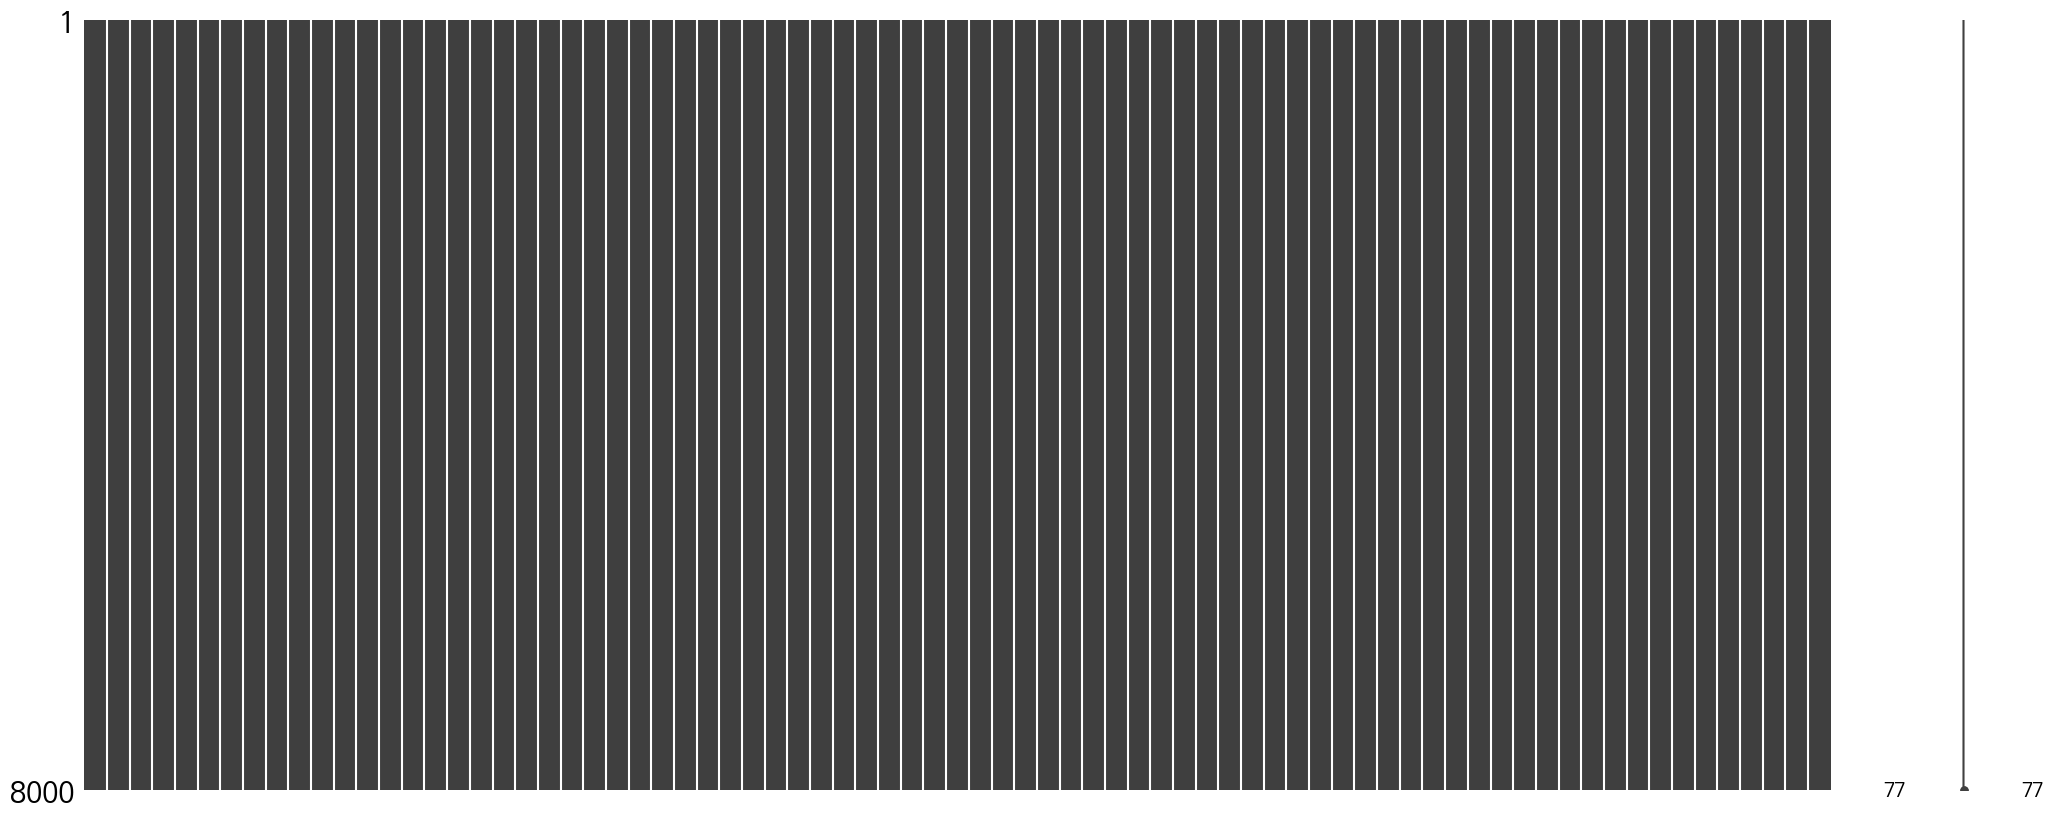

In [62]:
# prompt: 결측치를 시각화하라

import missingno as msno

# ... (your existing code)

# Visualize missing values using missingno
msno.matrix(df_merged)


In [ ]:
# Assuming df_encoded[:1] represents a single image's pixel data
# Reshape it to a 2D array assuming a square image for visualization
image_data = df_encoded[:1].select_dtypes(include=np.number) # Select only numeric columns
image_data = image_data.values.astype(np.float64) #Convert to numpy array and change dtype to float

# Get the dimensions for reshaping (assuming a square image)
num_pixels = image_data.shape[1]
image_side = int(np.sqrt(num_pixels)) # Calculate size for square

# Reshape the data for display
# image_data = image_data.reshape(image_side, image_side) #Reshape for visualization


# Display the image using matplotlib
plt.imshow(image_data, cmap='gray')
plt.show()

In [ ]:
# prompt: df_encoded[:10] 까지 imshow 코드로 square형태말고 한 줄로 시각화 해줄래

import matplotlib.pyplot as plt
import numpy as np

# Assuming df_encoded[:10] represents 10 images' pixel data
image_data = df_encoded[:10].select_dtypes(include=np.number)
image_data = image_data.values.astype(np.float64)

# Calculate the number of pixels and images
num_images, num_pixels = image_data.shape

# Assuming a square image
image_side = int(np.sqrt(num_pixels))


# Create a figure and axes
fig, axes = plt.subplots(10, 1, figsize=(20, 2))


for i in range(10):
  # Reshape the pixel data to a 1D array (assuming a square image)
  current_image = image_data[i].reshape(1,num_pixels)

  # Display the image
  axes[i].imshow(current_image, cmap='gray')
  axes[i].axis('off') # Hide axes

plt.show()

In [76]:
# prompt: PPL구입여부를 제외한 데이터의 100개 sample로 각 행의 cosine similarity를 구하하

from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Assuming df_encoded is your DataFrame with 'PPL구입여부' column
# Create a new DataFrame without the 'PPL구입여부' column
df_no_ppl = df_encoded.drop(columns=['PPL구입여부'])


# Select first 100 samples
sample_df = df_no_ppl.head(100)


# Convert DataFrame to a NumPy array for cosine similarity
sample_array = sample_df.to_numpy(dtype=np.float64)

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(sample_array)

# Print the cosine similarity matrix (optional)
print(similarity_matrix)


# Convert the similarity matrix to a DataFrame for better visualization (optional)
similarity_df = pd.DataFrame(similarity_matrix, index=sample_df.index, columns=sample_df.index)
similarity_df


[[1.         0.69374638 0.48689253 ... 0.65131101 0.79497058 0.67063413]
 [0.69374638 1.         0.85951202 ... 0.92017431 0.94259973 0.93426179]
 [0.48689253 0.85951202 1.         ... 0.97466339 0.90908111 0.96431016]
 ...
 [0.65131101 0.92017431 0.97466339 ... 1.         0.97608765 0.99759807]
 [0.79497058 0.94259973 0.90908111 ... 0.97608765 1.         0.98219318]
 [0.67063413 0.93426179 0.96431016 ... 0.99759807 0.98219318 1.        ]]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.693746,0.486893,0.748133,0.937609,0.968856,0.765381,0.690653,0.651354,0.932679,...,0.680777,0.754605,0.499463,0.645967,0.552033,0.509024,0.793581,0.651311,0.794971,0.670634
1,0.693746,1.000000,0.859512,0.942734,0.852251,0.815088,0.907528,0.912761,0.920184,0.830913,...,0.909009,0.914132,0.875578,0.901484,0.934664,0.893704,0.900206,0.920174,0.942600,0.934262
2,0.486893,0.859512,1.000000,0.938138,0.740709,0.675294,0.925446,0.963055,0.974651,0.755203,...,0.961848,0.935747,0.981245,0.976283,0.973995,0.983886,0.891048,0.974663,0.909081,0.964310
3,0.748133,0.942734,0.938138,1.000000,0.915935,0.880924,0.989276,0.991845,0.987984,0.920051,...,0.989470,0.993285,0.937807,0.984592,0.961824,0.948475,0.974740,0.987964,0.995293,0.991151
4,0.937609,0.852251,0.740709,0.915935,1.000000,0.990838,0.935801,0.888267,0.851533,0.991557,...,0.881053,0.920865,0.726171,0.850051,0.788367,0.745373,0.954849,0.851527,0.935679,0.858247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.509024,0.893704,0.983886,0.948475,0.745373,0.695057,0.922275,0.960351,0.976282,0.754865,...,0.966097,0.931171,0.987170,0.974364,0.986680,1.000000,0.884410,0.976273,0.920603,0.975578
96,0.793581,0.900206,0.891048,0.974740,0.954849,0.915416,0.993589,0.975475,0.945727,0.947497,...,0.972961,0.977180,0.858707,0.948751,0.917277,0.884410,1.000000,0.945726,0.968764,0.941776
97,0.651311,0.920174,0.974663,0.987964,0.851527,0.804951,0.969621,0.992571,0.999962,0.867069,...,0.988417,0.986468,0.977638,0.998455,0.980242,0.976273,0.945726,1.000000,0.976088,0.997598
98,0.794971,0.942600,0.909081,0.995293,0.935679,0.907766,0.980979,0.978238,0.976087,0.942830,...,0.972284,0.991308,0.917848,0.970482,0.937151,0.920603,0.968764,0.976088,1.000000,0.982193


## **코사인유사성과 PPL구입여부(0,1)과 상관성이 있으면 예측 모형이 필요없을 듯!!!**

In [63]:
# prompt: df_encoded를 나의 드라이브에 pickle로 저장하라

# Save the df_encoded DataFrame to your Google Drive as a pickle file
df_encoded.to_pickle('/content/drive/MyDrive/df_encoded.pkl')